# Seguros

Avaliação de seguros. Queremos prever se haverá acidente, assim, a variável dependente (target) será a coluna $\text{accident}$.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from yellowbrick.classifier import ConfusionMatrix


import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

In [2]:
from pathlib import Path
__THIS_PATH__ = Path().resolve()
__ROOT_PATH__ = __THIS_PATH__.parents[1]
__DATA_PATH__ = __ROOT_PATH__ / "data"

In [3]:
base_raw = pd.read_csv(__ROOT_PATH__/ 'data/insurance.csv')
print(base_raw.shape)
base_raw.head()

(20000, 28)


,Unnamed: 0,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,1,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,2,False,Senior,Prole,Cautious,Current,NaN,Football,NaN,Economy,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,3,False,Senior,UpperMiddle,Psychopath,Current,NaN,Football,NaN,FamilySedan,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,4,False,Adolescent,Middle,Normal,Older,NaN,EggShell,NaN,Economy,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,5,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many


In [4]:
# Removendo a coluna de nomes - Variável que não interessa na REgresssao.
base = base_raw.drop(columns = ['Unnamed: 0']).fillna("None")
print(base.shape)
base.head()

(20000, 27)


,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,False,Senior,Prole,Cautious,Current,None,Football,None,Economy,Normal,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,False,Senior,UpperMiddle,Psychopath,Current,None,Football,None,FamilySedan,Excellent,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,False,Adolescent,Middle,Normal,Older,None,EggShell,None,Economy,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many


y minúsculo e X maíusculo.

In [5]:
# variavel dependente, quero todas as linhas da coluna índice 7
y = base.iloc[:,7].values

# variáveis independentes, quero todas as linhas das outras colunas, ignorando a setima.
X = base.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]].values

# by FK
X0 = base.iloc[:, np.r_[0:7,8:27]].values
assert X0.all() == X.all()


In [6]:
set(y)

{'Mild', 'Moderate', 'None', 'Severe'}

In [7]:
X[1:3]

array([[False, 'Senior', 'Prole', 'Cautious', 'Current', 'None',
        'Football', 'Economy', 'Normal', 'TwentyThou', False, 'Normal',
        True, 'Thousand', False, 'TenThou', 'City', True, 'Thousand',
        'Thousand', True, 'Thousand', 'Good', True, 'Thousand', 'Zero'],
       [False, 'Senior', 'UpperMiddle', 'Psychopath', 'Current', 'None',
        'Football', 'FamilySedan', 'Excellent', 'Domino', True, 'Normal',
        False, 'Thousand', False, 'TwentyThou', 'City', False,
        'Thousand', 'Thousand', False, 'Thousand', 'Good', True,
        'Thousand', 'One']], dtype=object)

In [8]:
labelencoder = LabelEncoder()

In [9]:
for i in range(X.shape[1]):
    if X[:,i].dtype == 'object':
        X[:,i] = labelencoder.fit_transform(X[:,i])

In [10]:
print("DE: ")
print(X0[1:3])
print("\nPARA: ")
print(X[1:3])

DE: 
[[False 'Senior' 'Prole' 'Cautious' 'Current' 'None' 'Football' 'Economy'
  'Normal' 'TwentyThou' False 'Normal' True 'Thousand' False 'TenThou'
  'City' True 'Thousand' 'Thousand' True 'Thousand' 'Good' True
  'Thousand' 'Zero']
 [False 'Senior' 'UpperMiddle' 'Psychopath' 'Current' 'None' 'Football'
  'FamilySedan' 'Excellent' 'Domino' True 'Normal' False 'Thousand' False
  'TwentyThou' 'City' False 'Thousand' 'Thousand' False 'Thousand' 'Good'
  True 'Thousand' 'One']]

PARA: 
[[0 2 1 1 0 2 1 0 1 3 0 1 1 3 0 3 0 1 3 2 1 3 2 1 3 2]
 [0 2 2 3 0 2 1 1 0 0 1 1 0 3 0 4 0 0 3 2 0 3 2 1 3 1]]


In [11]:
# Entendendo um pouco do encoder. Agora, a variável 'Age' tem 3 valores diferentes 
# e a variável 'RiskAversion' tem 4 valores diferentes
print(base['Age'].unique())
print(set(base['RiskAversion'].values))

['Adult' 'Senior' 'Adolescent']
{'Cautious', 'Psychopath', 'Normal', 'Adventurous'}


In [12]:
# X independentes
# y a variável dependente
# Tamanho do teste de 30% e então, 70% para treino
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X,y,test_size=0.3, random_state=1)

In [13]:
modelo = GaussianNB()
modelo.fit(X_treinamento,y_treinamento)

GaussianNB()

In [14]:
# Estou fazendo as previsoes com X_teste.
# O y_teste contém o que de fato acontenceu. 
# Vou usar para comparar com as previsões do modelo generalizado!
previsoes = modelo.predict(X_teste)
previsoes

array(['None', 'None', 'None', ..., 'None', 'Mild', 'None'],
      shape=(6000,), dtype='<U8')

In [15]:
# verifico os resultados obtidos com o que de fato aconteceu (gabarito)
accuracy = accuracy_score(y_teste, previsoes)
# weighted trata todas as classes com o mesmo peso
precision = precision_score(y_teste, previsoes, average='weighted')
recall = recall_score(y_teste, previsoes, average='weighted')
f1 = f1_score(y_teste, previsoes, average='weighted')
print(f'Acuracia: {accuracy}, Precisão: {precision}, Recall {recall}, F1: {f1}')

Acuracia: 0.8383333333333334, Precisão: 0.8997074401842298, Recall 0.8383333333333334, F1: 0.8134258059061705


In [16]:
# Classification Report mostra as medidas de acuracia, precisão, recall e F1 para cada classe
# na linha anterior, estavamos olhando todas as classes (Mild, Moderate, None, Severe)
report =  classification_report(y_teste, previsoes)
print(report)

              precision    recall  f1-score   support

        Mild       0.69      0.73      0.71       542
    Moderate       0.35      0.73      0.47       505
        None       0.98      1.00      0.99      4228
      Severe       1.00      0.06      0.12       725

    accuracy                           0.84      6000
   macro avg       0.75      0.63      0.57      6000
weighted avg       0.90      0.84      0.81      6000



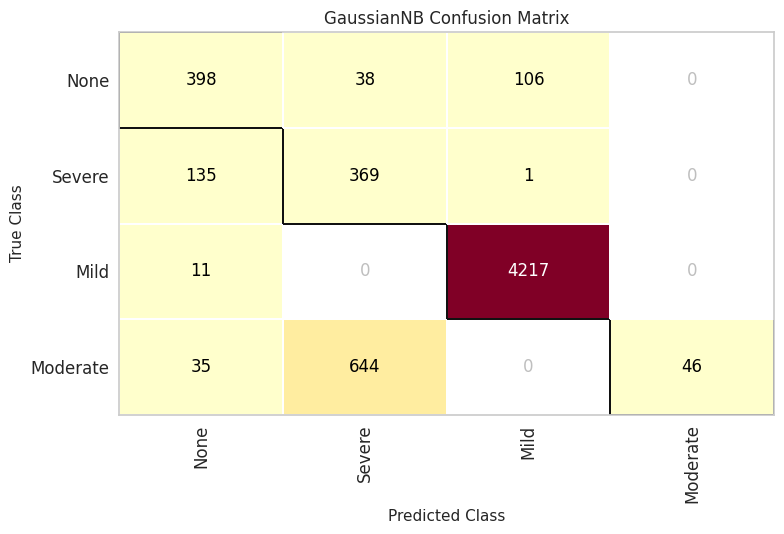

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
# Confusion Matrix faz suas próprias previsões. A Linha horizontal são os acertos

confusao = ConfusionMatrix(modelo, classes=['None','Severe','Mild','Moderate'])
confusao.fit(X_treinamento,y_treinamento)
confusao.score(X_teste,y_teste)
confusao.poof()